# Bank Marketing dataset exercise

This file is created as part of requirements in CE888.<br>
**Author** : Tomoko Ayakawa<br>
**Created on**: 28 January 2019<br>
**Last modified**: 28 January 2019

## Load data from a csv file

In [101]:
# import labraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('./bank-additional-full.csv', sep=';')

In [53]:
print ("The data has %d attributes" % (len(df.columns) - 1))
df.columns[:-1]

The data has 20 attributes


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

## Create a classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()

Format the data
- Convert categorical attribute to dummy variables
- Remove columns `y_no` and `duration`

In [57]:
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.drop(columns=['y_no', 'duration'])

print ("The data has %d attributes" % (len(df_dummies.columns) - 1))
df_dummies.columns[:-1]

The data has 62 attributes


Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

## Plot histogram of `y_yes`

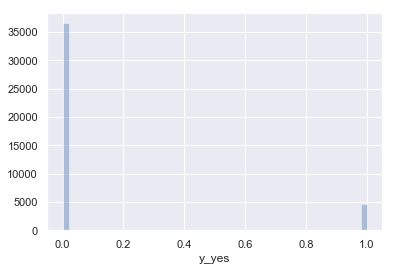

In [58]:
%matplotlib inline
sns.distplot(df_dummies['y_yes'], kde=False)

## Run Classifier

In [103]:
# convert DataFrame to numpy arrays
df_arr = df_dummies.values
features = df_arr[:,:-1]
targets = df_arr[:,-1]

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf.fit(features[:-500], targets[:-500])
p = clf.predict(features[-500:])
print ("Results:", p)
print ("Accuracy:", accuracy_score (p, targets[-500:]))
print ("Confusion_Matrix:")
print (pd.DataFrame (confusion_matrix
                     (p, targets[-500:], labels = [0, 1]),
                     index = ["  Actual: True", "  Actual: False"],
                     columns = ["Pred: True", "Pred: False"]))

Results: [1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.

## Cross validation

In [102]:
from sklearn.model_selection import KFold, cross_val_score

score = []
k_fold = KFold(n_splits=10)

for train_i, test_i in k_fold.split(features):
    print('Train: %s | test: %s' % (train_i, test_i))
    clf.fit(features[train_i], targets[train_i])
    score.append(clf.score(features[test_i], targets[test_i]))

print('Average accuracy: {} %'.format(np.mean(score)*100))

Train: [ 4119  4120  4121 ... 41185 41186 41187] | test: [   0    1    2 ... 4116 4117 4118]
Train: [    0     1     2 ... 41185 41186 41187] | test: [4119 4120 4121 ... 8235 8236 8237]
Train: [    0     1     2 ... 41185 41186 41187] | test: [ 8238  8239  8240 ... 12354 12355 12356]
Train: [    0     1     2 ... 41185 41186 41187] | test: [12357 12358 12359 ... 16473 16474 16475]
Train: [    0     1     2 ... 41185 41186 41187] | test: [16476 16477 16478 ... 20592 20593 20594]
Train: [    0     1     2 ... 41185 41186 41187] | test: [20595 20596 20597 ... 24711 24712 24713]
Train: [    0     1     2 ... 41185 41186 41187] | test: [24714 24715 24716 ... 28830 28831 28832]
Train: [    0     1     2 ... 41185 41186 41187] | test: [28833 28834 28835 ... 32949 32950 32951]
Train: [    0     1     2 ... 41185 41186 41187] | test: [32952 32953 32954 ... 37067 37068 37069]
Train: [    0     1     2 ... 37067 37068 37069] | test: [37070 37071 37072 ... 41185 41186 41187]
Average accuracy: 87.4

## Feature importances and confusion matrix